# A gentle Introduction to Bayesian Inference

- https://towardsdatascience.com/a-gentle-introduction-to-bayesian-inference-6a7552e313cb 

- No code - just an introduction to bayesian inference with a conceptual example.

<br>

***

<br>

# Beginner-friendly Bayesian Inference

- https://towardsdatascience.com/beginner-friendly-bayesian-inference-2e2839a9ae18

- No code - just the coin flip example with some graphs and formulas.

<br>

***

<br>

# Conducting Bayesian Inference in Python using PyMC3

- https://towardsdatascience.com/conducting-bayesian-inference-in-python-using-pymc3-d407f8d934a5

## Imports

In [1]:
import pymc as pm
import arviz as az

## Data

In [2]:
tosses = [
    1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
    0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
    0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
    1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
    1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
    0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
    1, 1, 1, 0, 0, 0, 1, 0, 1, 0
]

In [3]:
# Context manager - open up your model to start adding parameters and objects/functions
with pm.Model() as model:
    
    # define the prior
    theta = pm.Beta('theta', 2, 2)
    
    # define the likelihood
    data = pm.Bernoulli('data', theta, observed=tosses)
    
    # get the samples
    # pymc generates samples in parallel, which is why trace contains 500*cores of your machine samples (2000 most likely)
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 74 seconds.


In [12]:
# Let's look at our posterior distribution!
# trace.get_values('theta')
posterior = trace.posterior.stack(sample=['chain', 'draw'])
vals = posterior['theta']
vals

<xarray.DataArray 'theta' (sample: 4000)>
array([0.55519123, 0.60678743, 0.59305207, ..., 0.60127879, 0.64421332,
       0.48506325])
Coordinates:
  * sample   (sample) MultiIndex
  - chain    (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3
  - draw     (sample) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999

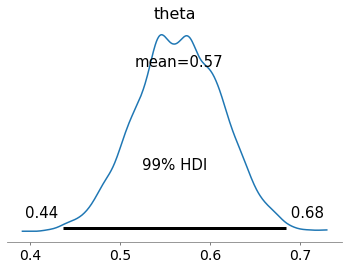

In [14]:
# Plot Posterior
# Highest Posterior Density/Interval - also called credible interval
az.plot_posterior(trace,hdi_prob=0.99);

99% probability our rate is between 44% & 68%

***
***
***